## Experiment 3

In [124]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

### Grey Scale Image

In [125]:
image = cv2.imread('tree.jpg', cv2.IMREAD_GRAYSCALE)

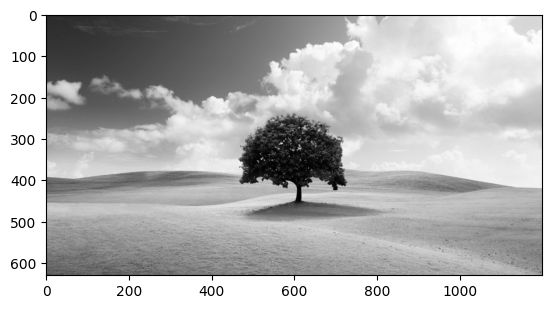

In [126]:
plt.imshow(image, cmap='gray')

### Gaussian Noise

In [127]:
noise = np.random.normal(0, 100, image.shape)
noisy_img = image + noise

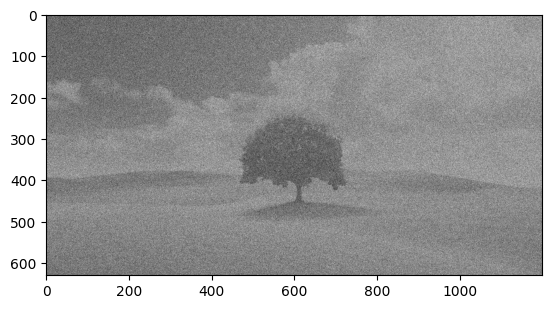

In [128]:
plt.imshow(noisy_img, cmap='gray')

### Low Pass Average Filter

In [129]:
filter = np.ones((3,3), np.float32)

In [130]:
def average(image, filter):
    val = 0
    for i in range(filter.shape[0]):
        for j in range(filter.shape[1]):
            val += image[i, j]*filter[i, j]

    return val/np.sum(filter)

def average_filter(image, filter, filter_size):
    for i in range(image.shape[0] - filter_size + 1):
        for j in range(image.shape[1] - filter_size + 1):
            image[i+1, j+1] = average(image[i:i+filter_size, j:j+filter_size], filter)
    return image

filtered_image = average_filter(noisy_image, filter, 3)

In [131]:
image.shape

(630, 1200)

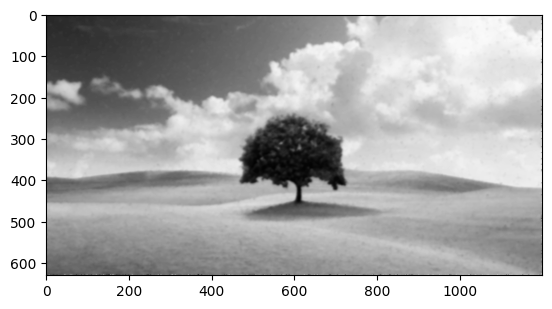

In [132]:
plt.imshow(filtered_image, cmap='gray')

### Low Pass Median Filter

In [148]:
import random
def add_salt_pepper_noise(image):
    row, col = image.shape
    random_noise = np.random.randint(9500, 100000)
    for i in range(random_noise):     
        y_coord=random.randint(0, row - 1) 
        x_coord=random.randint(0, col - 1) 
        image[y_coord][x_coord] = 255
          
    number_of_pixels = random.randint(9500 , 100000) 
    
    for i in range(number_of_pixels):  
        y_coord=random.randint(0, row - 1) 
        x_coord=random.randint(0, col - 1) 
        image[y_coord][x_coord] = 0
        
    return image

noisy_image = add_salt_pepper_noise(image)

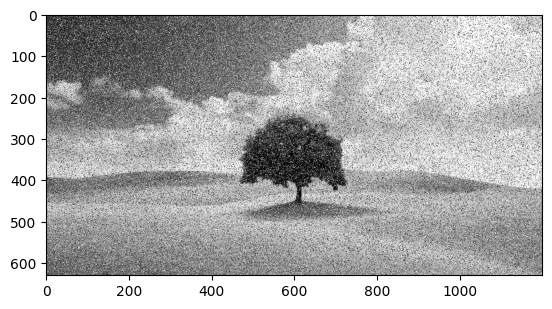

In [149]:
plt.imshow(noisy_image, cmap='gray')

In [150]:
def average_filter(image, filter_size):
    for i in range(image.shape[0] - filter_size + 1):
        for j in range(image.shape[1] - filter_size + 1):
            image[i+1, j+1] = np.median(image[i:i+filter_size, j:j+filter_size])
    return image

filtered_image = average_filter(noisy_image, 3)

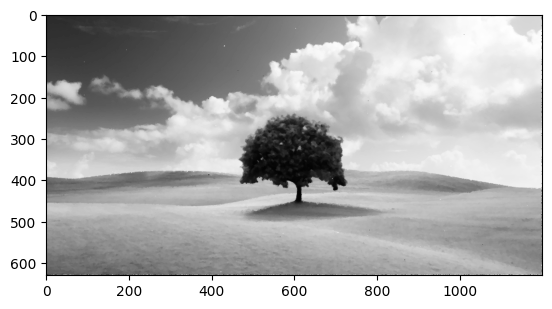

In [151]:
plt.imshow(filtered_image, cmap='gray')

In [146]:
image.shape

(630, 1200)